In [74]:
import joblib

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

import sys
sys.path.append('..')
from models.decision_tree import DecisionTree
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

In [75]:
df = pd.read_csv('../data/US_Accidents_March23_cleaned.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249353 entries, 0 to 249352
Data columns (total 44 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Severity               249353 non-null  int64  
 1   Start_Lat              249353 non-null  float64
 2   Start_Lng              249353 non-null  float64
 3   Street                 249353 non-null  object 
 4   City                   249353 non-null  object 
 5   County                 249353 non-null  object 
 6   State                  249353 non-null  object 
 7   Zipcode                249353 non-null  object 
 8   Timezone               249353 non-null  object 
 9   Airport_Code           249353 non-null  object 
 10  Temperature(F)         249353 non-null  float64
 11  Humidity(%)            249353 non-null  float64
 12  Pressure(in)           249353 non-null  float64
 13  Visibility(mi)         249353 non-null  float64
 14  Wind_Direction         249353 non-nu

In [76]:
df = df.drop(['Zipcode', 'Airport_Code','Street', 'Year', 'Start_Lat', 'Start_Lng', "Timezone"], axis=1)

In [77]:
df.columns

Index(['Severity', 'City', 'County', 'State', 'Temperature(F)', 'Humidity(%)',
       'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Amenity', 'Bump', 'Crossing', 'Give_Way',
       'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop',
       'Traffic_Calming', 'Traffic_Signal', 'Sunrise_Sunset', 'Civil_Twilight',
       'Nautical_Twilight', 'Astronomical_Twilight', 'Clear', 'Cloud', 'Rain',
       'Heavy_Rain', 'Snow', 'Heavy_Snow', 'Fog', 'Month', 'Weekday', 'Hour'],
      dtype='object')

In [78]:
# print all unique values in each column
for col in df.columns:
    print(col)
    print(df[col].unique())
    print(df[col].max(), df[col].min())
    print(df[col].unique().size)
    print()

Severity
[2 3 4 1]
4 1
4

City
['Latham' 'Buena Park' 'Kansas City' ... 'Borden' 'Bryceville'
 'East Patchogue']
Zwingle Abbeville
8455

County
['Albany' 'Orange' 'Wyandotte' ... 'Nueces' 'Fentress' 'Neosho']
Yuma Abbeville
1522

State
['NY' 'CA' 'KS' 'FL' 'UT' 'WY' 'OR' 'CO' 'MN' 'MD' 'OH' 'LA' 'NC' 'MI'
 'MO' 'PA' 'SC' 'NJ' 'VA' 'TX' 'GA' 'TN' 'CT' 'MS' 'MA' 'WA' 'AZ' 'DC'
 'AL' 'NH' 'IL' 'NV' 'MT' 'OK' 'RI' 'IN' 'IA' 'KY' 'DE' 'NE' 'NM' 'WV'
 'ND' 'WI' 'ID' 'AR' 'VT' 'ME' 'SD']
WY AL
49

Temperature(F)
[ 40.   61.   75.   54.   55.   66.   73.   27.   84.   46.   80.   62.
  21.   11.   77.   39.   67.   63.   29.   41.   53.   52.   47.   37.
  58.   90.   36.   97.   43.   65.   23.   49.   57.   64.   72.   48.
  85.   45.   74.   91.   78.   50.   76.   79.   83.   87.   71.   96.
  70.   26.   89.   34.   82.   81.   69.   46.9  86.  101.   35.    7.
  88.   59.   68.   33.   31.  103.  102.   42.   57.9  32.   60.   38.
  33.1  94.   51.   93.   12.   25.   44.   80.6  92.   6

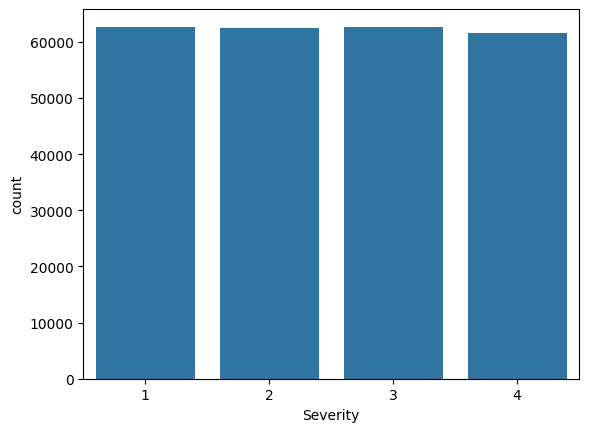

In [79]:
sns.countplot(x='Severity', data=df)
plt.show()

In [80]:
df_dummy = pd.get_dummies(df, drop_first=True)

target='Severity'
y = df_dummy[target]
X = df_dummy.drop(target, axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)
(X_train.shape, y_train.shape), (X_test.shape, y_test.shape)

(((199482, 10064), (199482,)), ((49871, 10064), (49871,)))

In [81]:
joblib.dump(X, '../models/model_columns.pkl')

['../models/model_columns.pkl']

# Model Training

## Helper Functions

In [82]:
def get_accuracy(prediction_labels, true_labels):    
    num_correct = np.sum(prediction_labels == true_labels)
    accuracy = num_correct / len(true_labels)
    return accuracy

## Random Forest

In [ ]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
rf_pred=rf.predict(X_test)

In [ ]:
rf_acc = get_accuracy(rf_pred, y_test)
print("[Random Forest] accuracy_score: {:.3f}.".format(rf_acc))

In [ ]:
joblib.dump(rf, '../models/random_forest_model.pkl')

# Decision Tree

In [83]:
dt = DecisionTree(max_depth=10)
dt.fit(X_train.values, y_train.values)
dt_pred = dt.predict(X_test.values)

In [ ]:
dt_acc = get_accuracy(dt_pred, y_test.values)
print("[Decision Tree] accuracy_score: {:.3f}.".format(dt_acc))

In [ ]:
joblib.dump(dt, '../models/decision_tree_model.pkl')

['../models/decision_tree_model_100rows.pkl']

# Naive Bayes

In [ ]:
X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)

nb = GaussianNB()
nb.fit(X_train, y_train)

nb_pred = nb.predict(X_test)

In [ ]:
nb_acc = (nb_pred == y_test).mean()  
print("[Naive Bayes] accuracy_score: {:.3f}.".format(nb_acc))

In [ ]:
joblib.dump(nb, '../models/naive_bayes_model.pkl')